___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
<center>*Copyright Pierian Data 2017*</center>
<center>*For more information, visit us at www.pieriandata.com*</center>

# Stock Market Analysis Project

### Please Note: You are free to treat this as a full exercise, or just view the solutions video as a code along project. This project is meant to be pretty challenging as it will introduce a few new concepts through some hints!

Welcome to your first capstone project! This project is meant to cap off the first half of the course, which mainly dealt with learning the libraries that we use in this course, the second half of the course will deal a lot more with quantitative trading techniques and platforms.

We'll be analyzing stock data related to a few car companies, from Jan 1 2012 to Jan 1 2017. Keep in mind that this project is mainly just to practice your skills with matplotlib, pandas, and numpy. Don't infer financial trading advice from the analysis we do here!

### Part 0: Import

** Import the various libraries you will need-you can always just come back up here or import as you go along :) **

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import pandas_datareader.data as web
import seaborn as sns

____
## Part 1: Getting the Data

### Tesla Stock (Ticker: TSLA on the NASDAQ)

**  *Note! Not everyone will be working on a computer that will give them open access to download the stock information using pandas_datareader (firewalls, admin permissions, etc...). Because of this, the csv file for the Tesla is provided in a data folder inside this folder. It is called Tesla_Stock.csv. Feel free to just use this with read_csv! **

** Use pandas_datareader to obtain the historical stock information for Tesla from Jan 1, 2012 to Jan 1, 2017.**



In [2]:
start = datetime.datetime(2012, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [3]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)
print(tesla.head())

                 High        Low       Open      Close   Volume  Adj Close
Date                                                                      
2012-01-03  29.500000  27.650000  28.940001  28.080000   928100  28.080000
2012-01-04  28.670000  27.500000  28.209999  27.709999   630100  27.709999
2012-01-05  27.930000  26.850000  27.760000  27.120001  1005500  27.120001
2012-01-06  27.790001  26.410000  27.200001  26.910000   986300  26.910000
2012-01-09  27.490000  26.120001  27.000000  27.250000   897000  27.250000


### Other Car Companies

** Repeat the same steps to grab data for Ford and GM (General Motors), **

In [4]:
ford = web.DataReader('F', 'yahoo', start, end)
ford.head()

High    Low   Open  Close      Volume  Adj Close
Date                                                         
2012-01-03  11.25  10.99  11.00  11.13  45709900.0   7.946151
2012-01-04  11.53  11.07  11.15  11.30  79725200.0   8.067521
2012-01-05  11.63  11.24  11.33  11.59  67877500.0   8.274564
2012-01-06  11.80  11.52  11.74  11.71  59840700.0   8.360237
2012-01-09  11.95  11.70  11.83  11.80  53981500.0   8.424490

In [5]:
gm = web.DataReader('GM', 'yahoo', start, end)
gm.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2012-01-03  21.180000  20.750000  20.830000  21.049999   9321300.0  16.640026
2012-01-04  21.370001  20.750000  21.049999  21.150000   7856700.0  16.719082
2012-01-05  22.290001  20.959999  21.100000  22.170000  17880600.0  17.525387
2012-01-06  23.030001  22.240000  22.260000  22.920000  18234500.0  18.118261
2012-01-09  23.430000  22.700001  23.200001  22.840000  12084500.0  18.055021

## Part 2: Visualizing the Data

** Time to visualize the data. **

** Follow along and recreate the plots below according to the instructions and explanations. **

____

** Recreate this linear plot of all the stocks' Open price ! Hint: For the legend, use label parameter and plt.legend()**

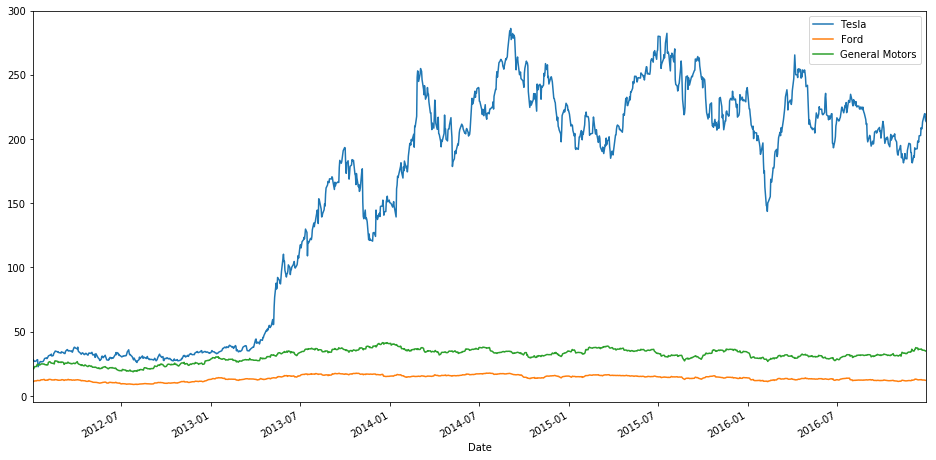

In [6]:
# Code Here
f = plt.subplots(figsize=(16,8))
# sns.lineplot(data=tesla, x=tesla.index, y='Close')
tesla['Close'].plot()
ford['Close'].plot()
gm['Close'].plot()
plt.legend(['Tesla','Ford','General Motors'])
plt.show()

____

** Plot the Volume of stock traded each day.**

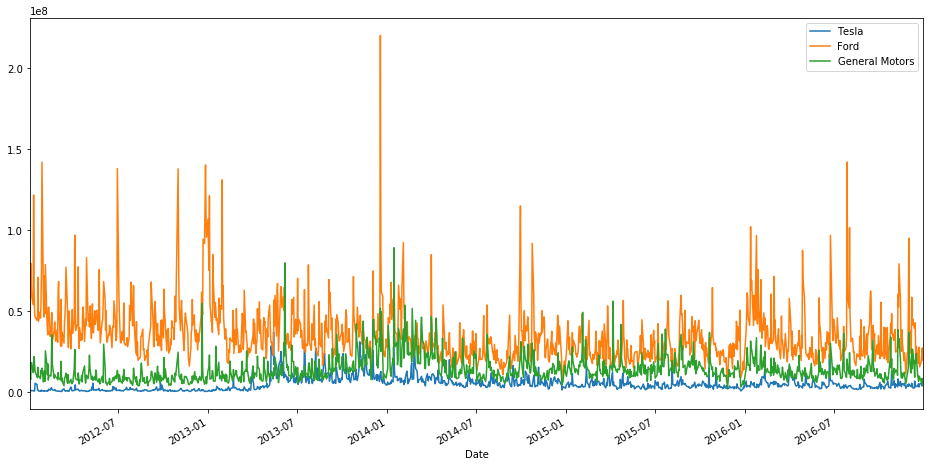

In [7]:
# Code Here
f = plt.subplots(figsize=(16,8))
tesla['Volume'].plot()
ford['Volume'].plot()
gm['Volume'].plot()
plt.legend(['Tesla','Ford','General Motors'])
plt.show()

** Interesting, looks like Ford had a really big spike somewhere in late 2013. What was the date of this maximum trading volume for Ford?**

**Bonus: What happened that day? **

In [8]:
ford['Volume'].idxmax()

Timestamp('2013-12-18 00:00:00')

In [9]:
"Aggressive Ford plans to hit profits, shares fall"

'Aggressive Ford plans to hit profits, shares fall'

____

** The Open Price Time Series Visualization makes Tesla look like its always been much more valuable as a company than GM and Ford. But to really understand this we would need to look at the total market cap of the company, not just the stock price. Unfortunately our current data doesn't have that information of total units of stock present. But what we can do as a simple calcualtion to try to represent total money traded would be to multply the Volume column by the Open price. Remember that this still isn't the actual Market Cap, its just a visual representation of the total amount of money being traded around using the time series. (e.g. 100 units of stock at \$10 each versus 100000 units of stock at $1 each)**

** Create a new column for each dataframe called "Total Traded" which is the Open Price multiplied by the Volume Traded.**

In [10]:
# Code Here 
def total_traded(company):
    company['Total Traded'] = company['Open']*company['Volume']
total_traded(tesla)
total_traded(ford)
total_traded(gm)
print(tesla.head())
print(ford.head())
print(gm.head())

                 High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2012-01-03  29.500000  27.650000  28.940001  28.080000   928100  28.080000   
2012-01-04  28.670000  27.500000  28.209999  27.709999   630100  27.709999   
2012-01-05  27.930000  26.850000  27.760000  27.120001  1005500  27.120001   
2012-01-06  27.790001  26.410000  27.200001  26.910000   986300  26.910000   
2012-01-09  27.490000  26.120001  27.000000  27.250000   897000  27.250000   

            Total Traded  
Date                      
2012-01-03  2.685921e+07  
2012-01-04  1.777512e+07  
2012-01-05  2.791268e+07  
2012-01-06  2.682736e+07  
2012-01-09  2.421900e+07  
             High    Low   Open  Close      Volume  Adj Close  Total Traded
Date                                                                       
2012-01-03  11.25  10.99  11.00  11.13  45709900.0   7.946151  5.028089e+08
2012-01-04  11.53  11.07  11.15  11.

** Plot this "Total Traded" against the time index.**

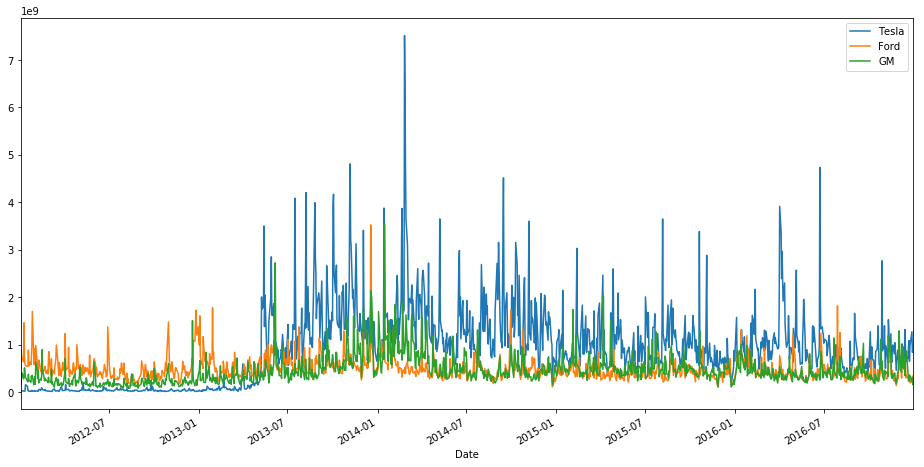

In [11]:
# Code here
plt.figure(figsize=(16,8))
tesla['Total Traded'].plot(label='Tesla')
ford['Total Traded'].plot(label='Ford')
gm['Total Traded'].plot(label='GM')
plt.legend()
plt.show()

** Interesting, looks like there was huge amount of money traded for Tesla somewhere in early 2014. What date was that and what happened? **

In [12]:
tesla[tesla['Total Traded'] == tesla['Total Traded'].max()].index

DatetimeIndex(['2014-02-25'], dtype='datetime64[ns]', name='Date', freq=None)

In [13]:
"Tesla shares shift into high gear better than expected earnings"

'Tesla shares shift into high gear better than expected earnings'

____

** Let's practice plotting out some MA (Moving Averages). Plot out the MA50 and MA200 for GM. **

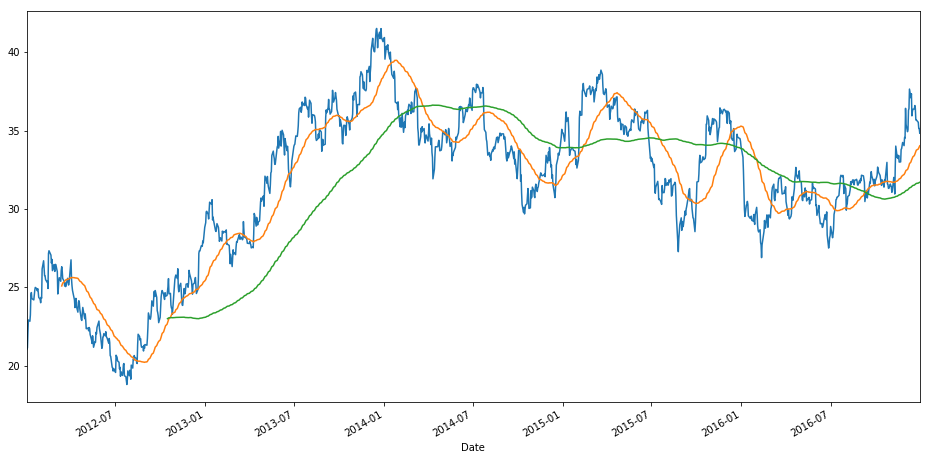

In [14]:
# Code here
gm['Close'].plot(figsize=(16,8))
gm['Close'].rolling(50).mean().plot(figsize=(16,8))
gm['Close'].rolling(200).mean().plot(figsize=(16,8))

______

** Finally lets see if there is a relationship between these stocks, after all, they are all related to the car industry. We can see this easily through a scatter matrix plot. Import scatter_matrix from pandas.plotting and use it to create a scatter matrix plot of all the stocks'opening price. You may need to rearrange the columns into a new single dataframe. Hints and info can be found here: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot **

In [15]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002AFE5477780>,
      dtype=object)

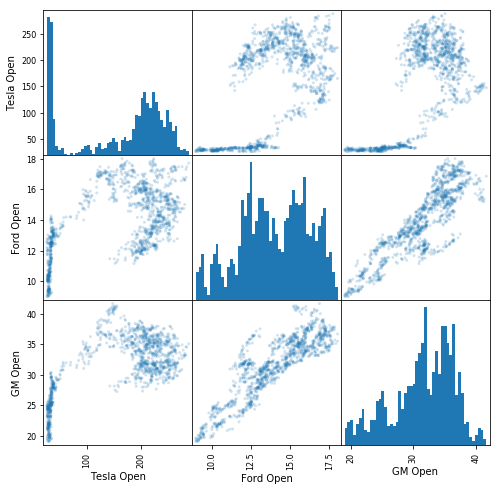

In [16]:
df = pd.concat([tesla['Open'], ford['Open'], gm['Open']], axis=1)
df.columns = ['Tesla Open', 'Ford Open', 'GM Open']
scatter_matrix(df, alpha=0.2, figsize=(8, 8), hist_kwds={'bins':50})

_____
### Bonus Visualization Task! (Note: This is hard!)
**Let's now create a candlestick chart! Watch the video if you get stuck on trying to recreate this visualization, there are quite a few steps involved!Refer to the video to understand how to interpret and read this chart. Hints: https://matplotlib.org/examples/pylab_examples/finance_demo.html**

** Create a CandleStick chart for Ford in January 2012 (too many dates won't look good for a candlestick chart)**

In [17]:
ford_candle = ford.loc['2012-01']
ford_candle

High    Low   Open  Close       Volume  Adj Close  Total Traded
Date                                                                        
2012-01-03  11.25  10.99  11.00  11.13   45709900.0   7.946151  5.028089e+08
2012-01-04  11.53  11.07  11.15  11.30   79725200.0   8.067521  8.889359e+08
2012-01-05  11.63  11.24  11.33  11.59   67877500.0   8.274564  7.690521e+08
2012-01-06  11.80  11.52  11.74  11.71   59840700.0   8.360237  7.025298e+08
2012-01-09  11.95  11.70  11.83  11.80   53981500.0   8.424490  6.386011e+08
2012-01-10  12.05  11.63  12.00  11.80  121750600.0   8.424490  1.461007e+09
2012-01-11  12.18  11.65  11.74  12.07   63806000.0   8.617258  7.490824e+08
2012-01-12  12.18  11.89  12.16  12.14   48687700.0   8.667233  5.920424e+08
2012-01-13  12.08  11.84  12.01  12.04   46366700.0   8.595837  5.568641e+08
2012-01-17  12.26  11.96  12.20  12.02   44398400.0   8.581561  5.416605e+08
2012-01-18  12.37  12.00  12.03  12.34   47102700.0   8.810020  5.666455e+08
2012-01-19  12.72  12.43  12.48  12.61   70894200.0   9.002781  8.847596e+08
2012-01-20  12.64  12.45  12.55  12.59   43705700.0   8.988503  5.485065e+08
2012-01-23  12.84  12.55  12.69  12.66   49379700.0   9.038480  6.266284e+08
2012-01-24  12.86  12.46  12.56  12.82   45768400.0   9.152712  5.748511e+08
2012-01-25  12.98  12.70  12.80  12.93   54021600.0   9.231242  6.914765e+08
2012-01-26  13.05  12.66  13.03  12.79   75470700.0   9.131294  9.833832e+08
2012-01-27  12.53  11.79  11.96  12.21  142155300.0   8.751419  1.700177e+09
2012-01-30  12.44  12.00  12.06  12.29   57752600.0   8.808761  6.964964e+08
2012-01-31  12.51  12.20  12.47  12.42   46412100.0   8.901936  5.787589e+08

In [18]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=ford_candle.index,
                open=ford_candle['Open'],
                high=ford_candle['High'],
                low=ford_candle['Low'],
                close=ford_candle['Close'])])

fig.show()

____
# Part 3: Basic Financial Analysis

Now it is time to focus on a few key financial calculations. This will serve as your transition to the second half of the course. All you need to do is follow along with the instructions, this will mainly be an exercise in converting a mathematical equation or concept into code using python and pandas, something we will do often when working with quantiative data! If you feel very lost in this section, don't worry! Just go to the solutions lecture and treat it as a code-along lecture, use whatever style of learning works best for you!

Let's begin!
____

## Daily Percentage Change
First we will begin by calculating the daily percentage change. Daily percentage change is defined by the following formula:

$ r_t = \frac{p_t}{p_{t-1}} -1$

This defines r_t (return at time t) as equal to the price at time t divided by the price at time t-1 (the previous day) minus 1. Basically this just informs you of your percent gain (or loss) if you bought the stock on day and then sold it the next day. While this isn't necessarily helpful for attempting to predict future values of the stock, its very helpful in analyzing the volatility of the stock. If daily returns have a wide distribution, the stock is more volatile from one day to the next. Let's calculate the percent returns and then plot them with a histogram, and decide which stock is the most stable!

** Create a new column for each dataframe called returns. This column will be calculated from the Close price column. There are two ways to do this, either a simple calculation using the .shift() method that follows the formula above, or you can also use pandas' built in pct_change method. **

In [19]:
def daily_return(company):
    company['returns'] = (company['Close']/company['Close'].shift(1)) - 1

daily_return(tesla)
tesla.head()

High        Low       Open      Close   Volume  Adj Close  \
Date                                                                         
2012-01-03  29.500000  27.650000  28.940001  28.080000   928100  28.080000   
2012-01-04  28.670000  27.500000  28.209999  27.709999   630100  27.709999   
2012-01-05  27.930000  26.850000  27.760000  27.120001  1005500  27.120001   
2012-01-06  27.790001  26.410000  27.200001  26.910000   986300  26.910000   
2012-01-09  27.490000  26.120001  27.000000  27.250000   897000  27.250000   

            Total Traded   returns  
Date                                
2012-01-03  2.685921e+07       NaN  
2012-01-04  1.777512e+07 -0.013177  
2012-01-05  2.791268e+07 -0.021292  
2012-01-06  2.682736e+07 -0.007743  
2012-01-09  2.421900e+07  0.012635

In [20]:
daily_return(ford)
ford.head()

High    Low   Open  Close      Volume  Adj Close  Total Traded  \
Date                                                                          
2012-01-03  11.25  10.99  11.00  11.13  45709900.0   7.946151  5.028089e+08   
2012-01-04  11.53  11.07  11.15  11.30  79725200.0   8.067521  8.889359e+08   
2012-01-05  11.63  11.24  11.33  11.59  67877500.0   8.274564  7.690521e+08   
2012-01-06  11.80  11.52  11.74  11.71  59840700.0   8.360237  7.025298e+08   
2012-01-09  11.95  11.70  11.83  11.80  53981500.0   8.424490  6.386011e+08   

             returns  
Date                  
2012-01-03       NaN  
2012-01-04  0.015274  
2012-01-05  0.025664  
2012-01-06  0.010354  
2012-01-09  0.007686

In [21]:
daily_return(gm)
gm.head()

High        Low       Open      Close      Volume  Adj Close  \
Date                                                                            
2012-01-03  21.180000  20.750000  20.830000  21.049999   9321300.0  16.640026   
2012-01-04  21.370001  20.750000  21.049999  21.150000   7856700.0  16.719082   
2012-01-05  22.290001  20.959999  21.100000  22.170000  17880600.0  17.525387   
2012-01-06  23.030001  22.240000  22.260000  22.920000  18234500.0  18.118261   
2012-01-09  23.430000  22.700001  23.200001  22.840000  12084500.0  18.055021   

            Total Traded   returns  
Date                                
2012-01-03  1.941627e+08       NaN  
2012-01-04  1.653835e+08  0.004751  
2012-01-05  3.772807e+08  0.048227  
2012-01-06  4.059000e+08  0.033829  
2012-01-09  2.803604e+08 -0.003490

** Now plot a histogram of each companies returns. Either do them separately, or stack them on top of each other. Which stock is the most "volatile"? (as judged by the variance in the daily returns we will discuss volatility in a lot more detail in future lectures.)**

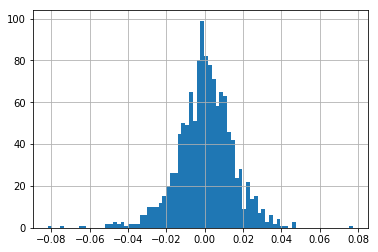

In [22]:
ford['returns'].hist(bins=80)

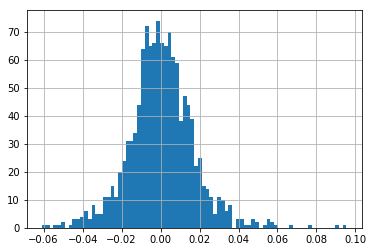

In [23]:
gm['returns'].hist(bins=80)

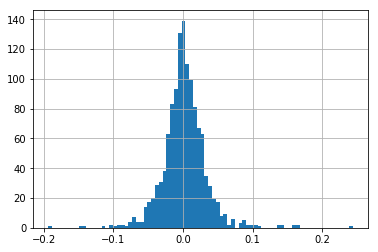

In [24]:
tesla['returns'].hist(bins=80)

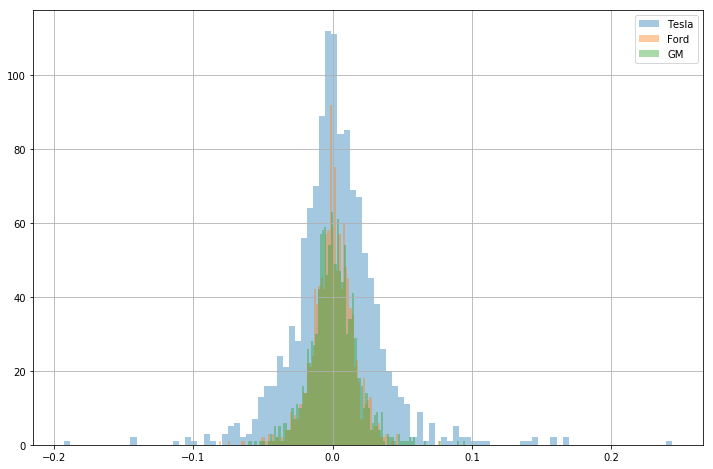

In [25]:
plt.subplots(figsize=(12,8))
tesla['returns'].hist(label='Tesla', bins=100, alpha=0.4)
ford['returns'].hist(label='Ford', bins=100, alpha=0.4)
gm['returns'].hist(label='GM', bins=100, alpha=0.4)
plt.legend()

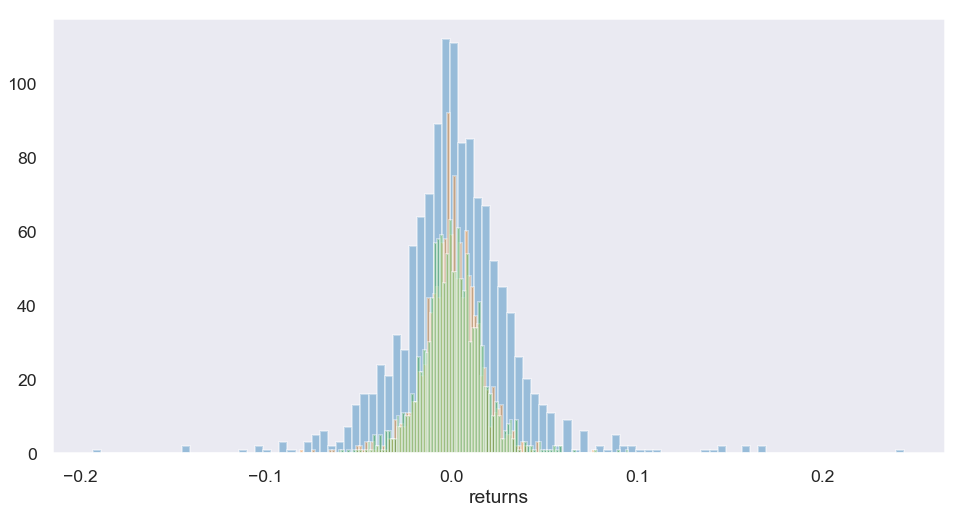

<function seaborn.rcmod.reset_orig()>

<Figure size 432x288 with 0 Axes>

In [43]:
plt.figure(figsize=(16,8))
sns.set_context("poster", font_scale=0.8)
sns.set_style('dark')
sns.distplot(tesla['returns'], kde=False, bins=100);
sns.distplot(ford['returns'], kde=False, bins=100);
sns.distplot(gm['returns'], kde=False, bins=100);
plt.show()

plt.clf()
sns.reset_orig

** Try also plotting a KDE instead of histograms for another view point. Which stock has the widest plot? **

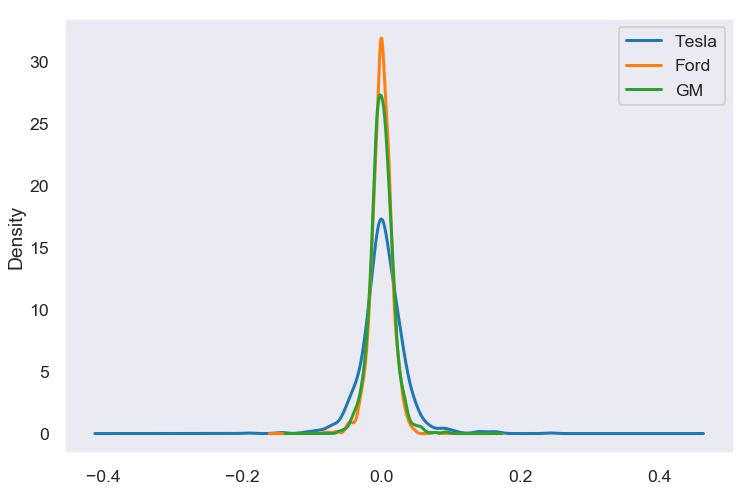

In [45]:
plt.figure(figsize=(12,8))
tesla['returns'].plot(kind='kde', label='Tesla')
ford['returns'].plot(kind='kde', label='Ford')
gm['returns'].plot(kind='kde', label='GM')
plt.legend()

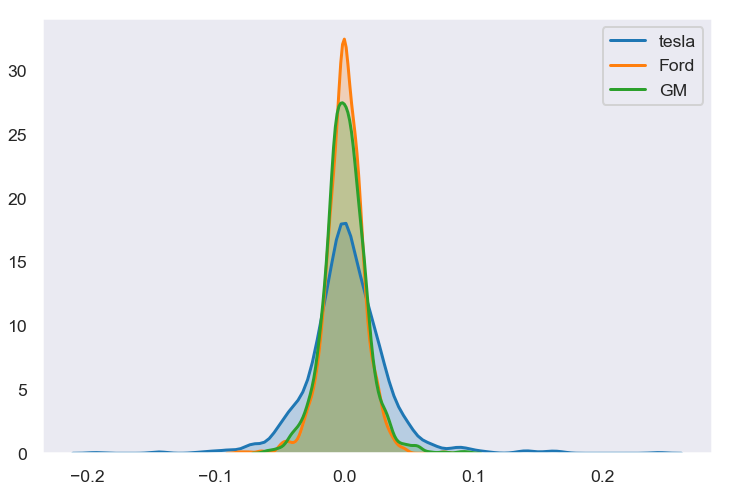

<Figure size 432x288 with 0 Axes>

In [47]:
plt.figure(figsize=(12,8))
#kde plots
sns.set_context("poster", font_scale=0.8)
sns.kdeplot(tesla['returns'], shade=True)
sns.kdeplot(ford['returns'], shade=True)
sns.kdeplot(gm['returns'], shade=True)
plt.legend(['tesla','Ford','GM'])
plt.show()
sns.reset_orig
plt.clf()

** Try also creating some box plots comparing the returns. **

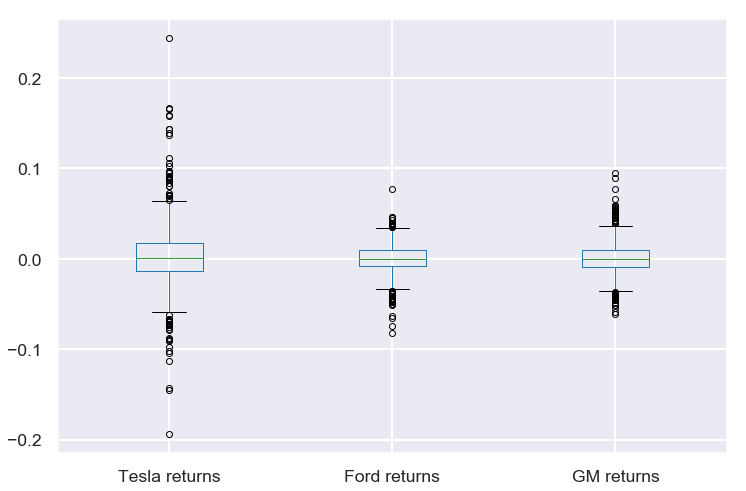

In [49]:
plt.figure(figsize=(12,8))
box_df = pd.concat([tesla['returns'],ford['returns'],gm['returns']], axis=1)
box_df.columns = ['Tesla returns', 'Ford returns', 'GM returns']
box_df.boxplot()

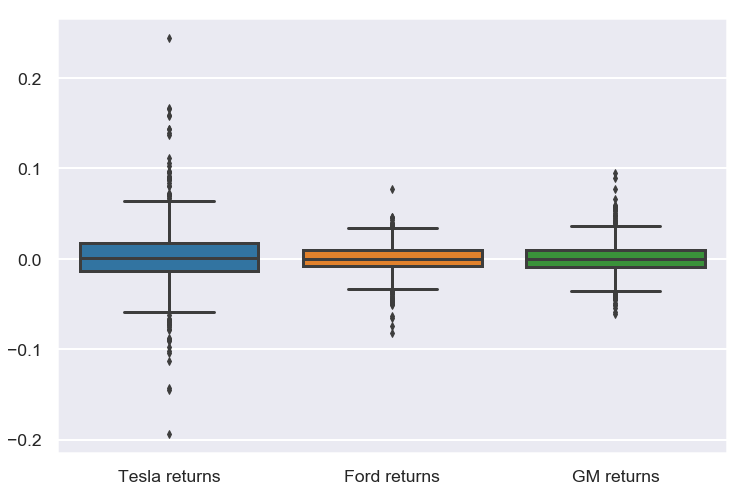

<function seaborn.rcmod.reset_orig()>

In [50]:
plt.figure(figsize=(12,8))
#box plots
sns.set_style("darkgrid")
sns.boxplot(data=box_df)

plt.show()
sns.reset_orig

## Comparing Daily Returns between Stocks

** Create a scatter matrix plot to see the correlation between each of the stocks daily returns. This helps answer the questions of how related the car companies are. Is Tesla begin treated more as a technology company rather than a car company by the market?**

[Text(0, 0, '-0.2'), Text(0, 0, '0.0'), Text(0, 0, '0.2')]

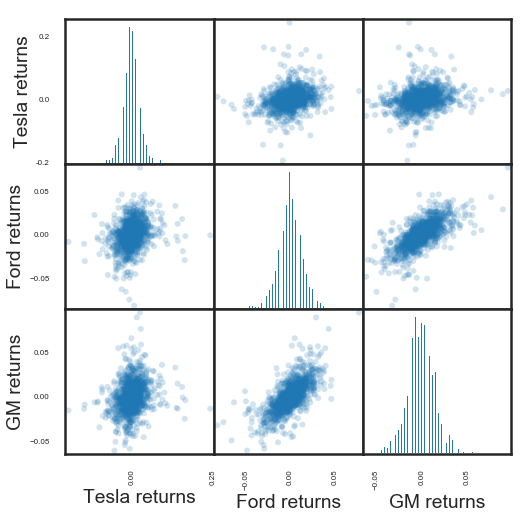

In [51]:
sns.set_style("white")
axes = scatter_matrix(box_df, alpha=0.2, figsize=(8, 8), hist_kwds={'bins':50})
new_labels = [round(float(i.get_text()), 2) for i in axes[0,0].get_yticklabels()]
axes[0,0].set_yticklabels(new_labels)

** It looks like Ford and GM do have some sort of possible relationship, let's plot just these two against eachother in scatter plot to view this more closely!**

Text(0, 0.5, 'Ford returns')

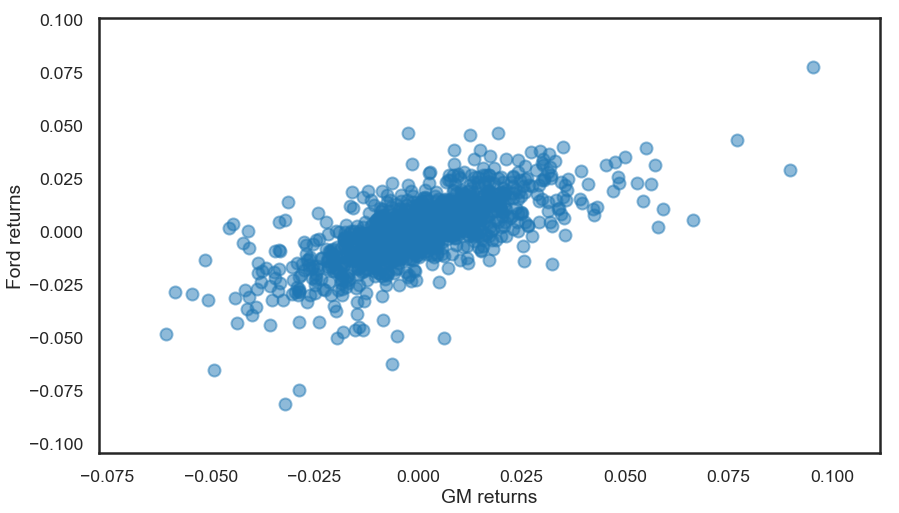

In [52]:
plt.figure(figsize=(14,8))
plt.scatter(gm['returns'], ford['returns'], alpha=0.5)
plt.xlabel('GM returns')
plt.ylabel('Ford returns')

____
## Cumulative Daily Returns

Great! Now we can see which stock was the most wide ranging in daily returns (you should have realized it was Tesla, our original stock price plot should have also made that obvious).

With daily cumulative returns, the question we are trying to answer is the following, if I invested $1 in the company at the beginning of the time series, how much would is be worth today? This is different than just the stock price at the current day, because it will take into account the daily returns. Keep in mind, our simple calculation here won't take into account stocks that give back a dividend. Let's look at some simple examples:

Lets us say there is a stock 'ABC' that is being actively traded on an exchange. ABC has the following prices corresponding to the dates given

    Date                        Price
    01/01/2018                   10
    01/02/2018                   15
    01/03/2018                   20
    01/04/2018                   25

**Daily Return** : Daily return is the profit/loss made by the stock compared to the previous day. (This is what ew just calculated above). A value above one indicates profit, similarly a value below one indicates loss. It is also expressed in percentage to convey the information better. (When expressed as percentage, if the value is above 0, the stock had give you profit else loss). So for the above example the daily returns would be

    Date                         Daily Return                  %Daily Return
    01/01/2018                 10/10 =  1                          -   
    01/02/2018                 15/10 =  3/2                       50%
    01/03/2018                 20/15 =  4/3                       33%
    01/04/2018                 25/20 =  5/4                       20%

**Cumulative Return**: While daily returns are useful, it doesn't give the investor a immediate insight into the gains he had made till date, especially if the stock is very volatile. Cumulative return is computed relative to the day investment is made.  If cumulative return is above one, you are making profits else you are in loss. So for the above example cumulative gains are as follows

    Date                       Cumulative Return         %Cumulative Return
    01/01/2018                  10/10 =  1                         100 %   
    01/02/2018                  15/10 =  3/2                       150 %
    01/03/2018                  20/10 =  2                         200 %
    01/04/2018                  25/10 =  5/2                       250 %

The formula for a cumulative daily return is:

$ i_i = (1+r_t) * i_{t-1} $

Here we can see we are just multiplying our previous investment at i at t-1 by 1+our percent returns. Pandas makes this very simple to calculate with its cumprod() method. Using something in the following manner:

    df[daily_cumulative_return] = ( 1 + df[pct_daily_return] ).cumprod()
    

** Create a cumulative daily return column for each car company's dataframe.**

In [33]:
def c_return(company):
    company['Cumulative Return'] = ( 1 + company['returns']).cumprod()
c_return(tesla)
c_return(ford)
c_return(gm)
tesla.tail()

High         Low        Open       Close   Volume  \
Date                                                                  
2016-12-23  213.449997  207.710007  208.000000  213.339996  4662900   
2016-12-27  222.250000  214.419998  214.880005  219.529999  5915700   
2016-12-28  223.800003  217.199997  221.529999  219.740005  3782500   
2016-12-29  219.199997  214.119995  218.559998  214.679993  4035900   
2016-12-30  217.500000  211.679993  216.300003  213.690002  4642600   

             Adj Close  Total Traded   returns  Cumulative Return  
Date                                                               
2016-12-23  213.339996  9.698832e+08  0.023459           7.597578  
2016-12-27  219.529999  1.271166e+09  0.029015           7.818020  
2016-12-28  219.740005  8.379372e+08  0.000957           7.825499  
2016-12-29  214.679993  8.820863e+08 -0.023027           7.645299  
2016-12-30  213.690002  1.004194e+09 -0.004611           7.610043

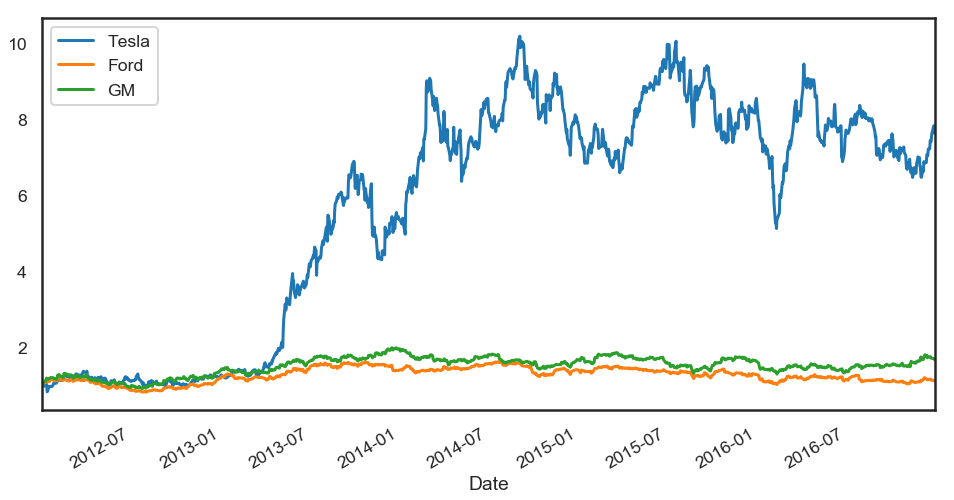

In [53]:
plt.figure(figsize=(16,8))

tesla['Cumulative Return'].plot(label='Tesla')
ford['Cumulative Return'].plot(label='Ford')
gm['Cumulative Return'].plot(label='GM')
plt.legend()
plt.show()

** Now plot the Cumulative Return columns against the time series index. Which stock showed the highest return for a $1 invested? Which showed the lowest?**

# Great Job!

That is it for thsi very basic analysis, this concludes this half of the course, which focuses much more on learning the tools of the trade. The second half of the course is where we really dive into functionality designed for time series, quantitative analysis, algorithmic trading, and much more!